In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("KaggleV2-May-2016.csv")
data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [3]:
data.shape

(110527, 14)

In [4]:
data.duplicated().sum()

0

In [5]:
data.PatientId.nunique()

62299

In [6]:
data.PatientId.duplicated().sum()

48228

In [7]:
data.duplicated(['PatientId', 'No-show']).sum()
#there is a 38710 duplicated data we will remove them

38710

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
data['Age'].describe()
#as you notice here there's an age = -1 and that's not logical

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
mask = data[data['Age'] == -1]
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**Data Cleaning**

In [12]:
data.drop(index=99832, inplace=True)

In [13]:
data.Age.describe()
#now the minimum age is 0 not -1

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [14]:
data.drop_duplicates(['PatientId', 'No-show'], inplace=True)

In [15]:
data.shape

(71816, 14)

In [16]:
#removing unnecessary data
data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [17]:
data

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


**General look about the data after cleaning**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Scholarship'}>,
        <Axes: title={'center': 'Hipertension'}>],
       [<Axes: title={'center': 'Diabetes'}>,
        <Axes: title={'center': 'Alcoholism'}>,
        <Axes: title={'center': 'Handcap'}>],
       [<Axes: title={'center': 'SMS_received'}>, <Axes: >, <Axes: >]],
      dtype=object)

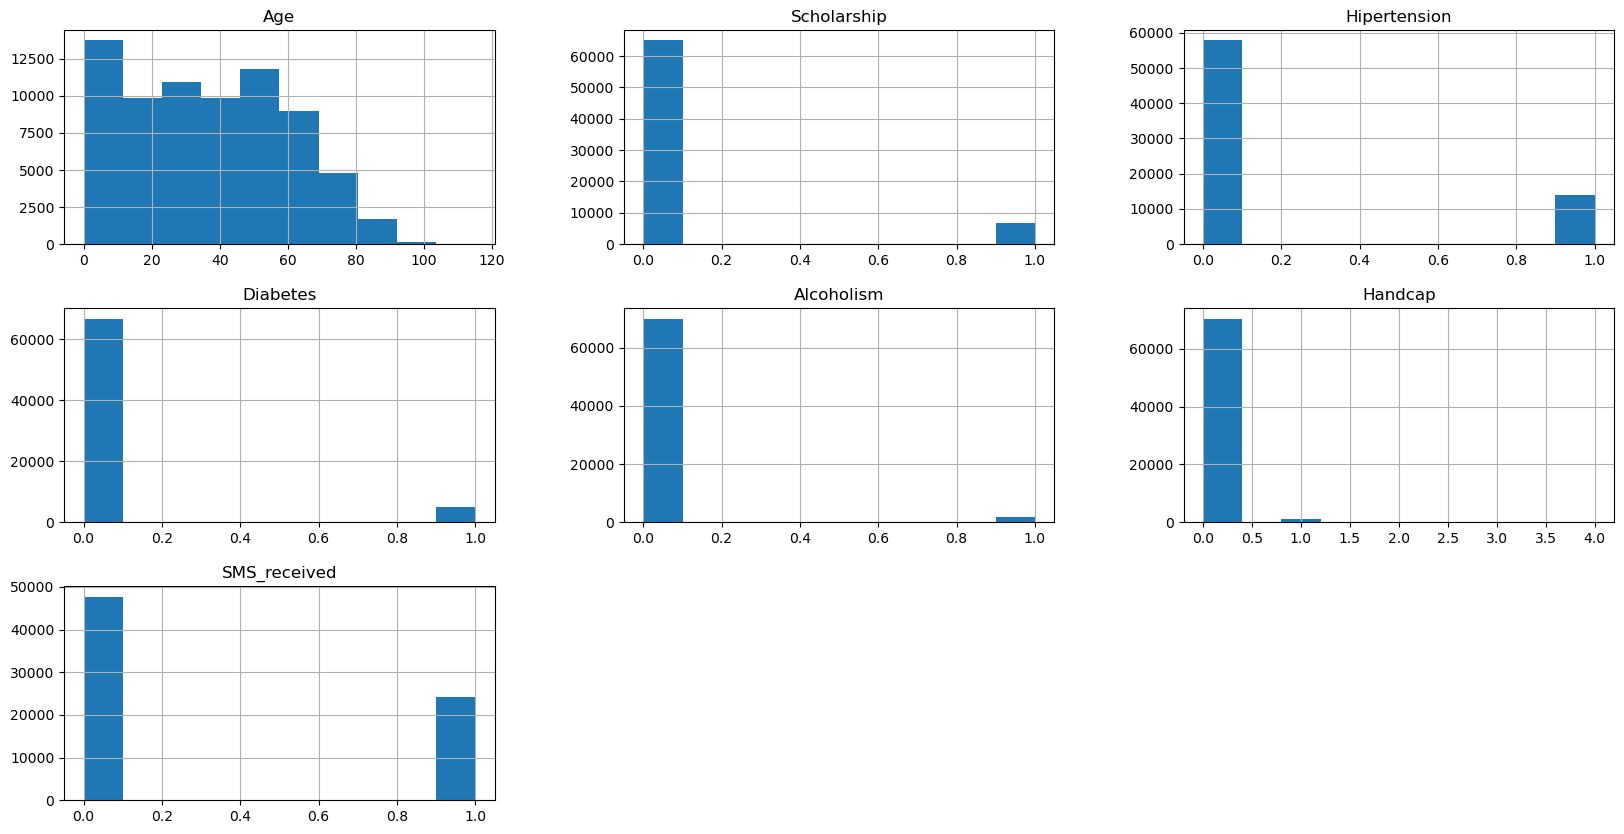

In [18]:
data.hist(figsize=(20,10))

In [19]:
data['No-show'].value_counts()

No-show
No     54153
Yes    17663
Name: count, dtype: int64

In [20]:
show = data['No-show'] == 'No'
noShow = data['No-show'] == 'Yes'

In [21]:
data[show]['Age'].mean()

37.22916551252931

In [22]:
data[noShow]['Age'].mean()

34.37626677234898

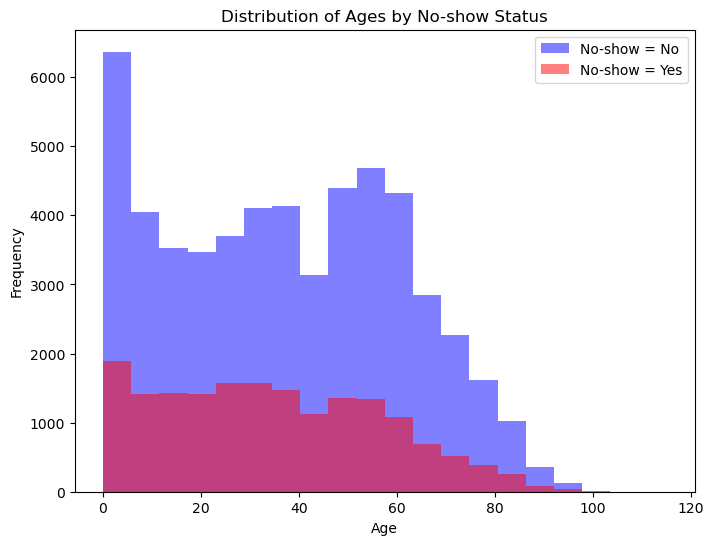

In [23]:
import matplotlib.pyplot as plt

# Filter rows where 'No-show' is 'No' and plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data[show]['Age'], bins=20, color='blue', alpha=0.5, label='No-show = No')

# Filter rows where 'No-show' is 'Yes' and plot histogram
plt.hist(data[noShow]['Age'], bins=20, color='red', alpha=0.5, label='No-show = Yes')

plt.title('Distribution of Ages by No-show Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [24]:
data[show].groupby(['Hipertension','Diabetes'])['Age'].mean()

Hipertension  Diabetes
0             0           30.713360
              1           53.701370
1             0           60.270517
              1           63.764303
Name: Age, dtype: float64

In [25]:
data[noShow].groupby(['Hipertension','Diabetes'])['Age'].mean()

Hipertension  Diabetes
0             0           28.768691
              1           49.481172
1             0           58.650380
              1           62.913282
Name: Age, dtype: float64

Text(0, 0.5, 'mean age')

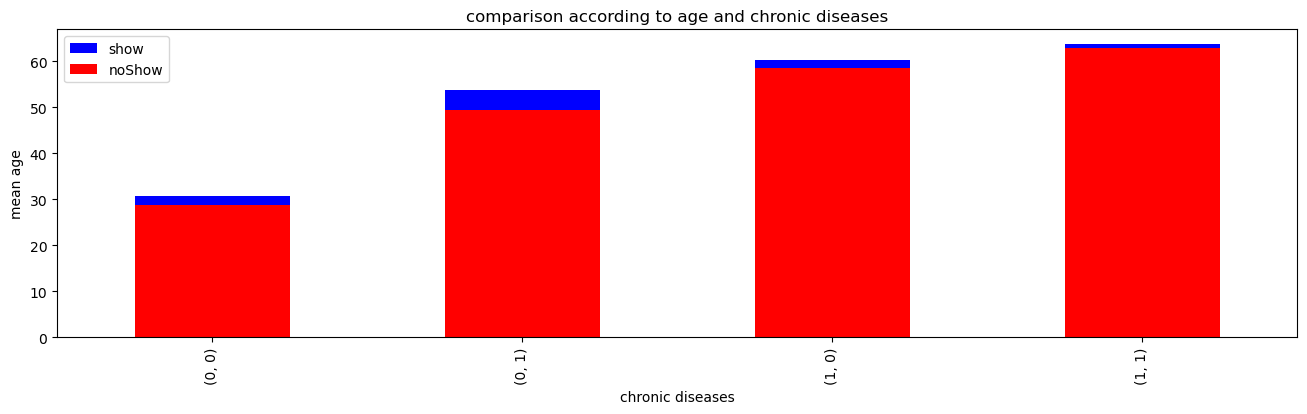

In [26]:
#does age and chronic diseases affect the attendance together?
plt.figure(figsize=(16,4))
data[show].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='blue', label= 'show')
data[noShow].groupby(['Hipertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='red', label= 'noShow')
plt.legend()
plt.title('comparison according to age and chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')

Text(0.5, 1.0, 'Comparison between attendances by gender')

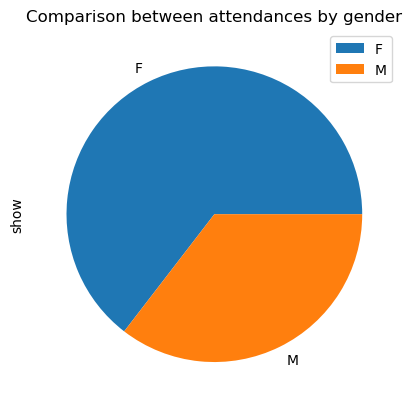

In [27]:
#what is the precentage of gender attending?
data['Gender'][show].value_counts(normalize=True).plot(kind='pie', label = 'show')
plt.legend()
plt.title('Comparison between attendances by gender')


Text(0.5, 1.0, 'Comparison between absents by gender')

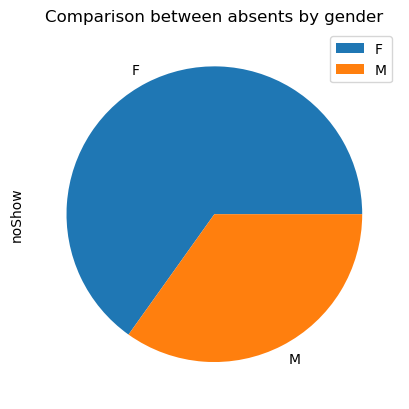

In [28]:
data['Gender'][noShow].value_counts(normalize=True).plot(kind='pie', label = 'noShow')
plt.legend()
plt.title('Comparison between absents by gender')

It seems like they are similar. so, gender don't effect on attendance

In [29]:
#does age and chronic Gender affect the attendance together? (check by gender mean age)
data[show].groupby('Gender')['Age'].mean()

Gender
F    39.130292
M    33.766269
Name: Age, dtype: float64

In [30]:
data[noShow].groupby('Gender')['Age'].mean()

Gender
F    36.06501
M    31.22040
Name: Age, dtype: float64

Text(0, 0.5, 'mean age')

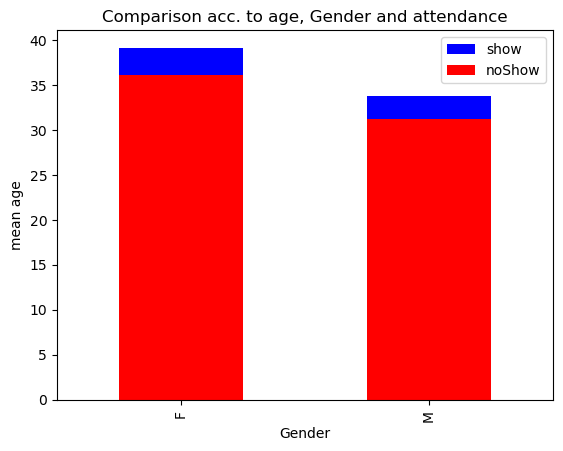

In [31]:
data[show].groupby('Gender')['Age'].mean().plot(kind='bar', color = 'blue', label = 'show')
data[noShow].groupby('Gender')['Age'].mean().plot(kind='bar', color = 'red',label = 'noShow')
plt.legend()
plt.title('Comparison acc. to age, Gender and attendance')
plt.xlabel('Gender')
plt.ylabel('mean age')

There is no correlation between age and gender affecting the show rate.
The mean of gender ages are almost the same

Text(0, 0.5, 'Patient No.')

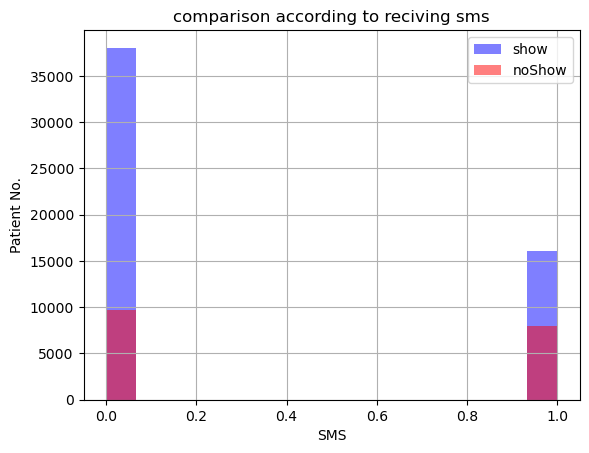

In [32]:
#does reciving sms affect the attendance?
data['SMS_received'][show].hist(alpha = .5, bins = 15, color = 'blue', label = 'show')
data['SMS_received'][noShow].hist(alpha = .5, bins = 15, color = 'red', label = 'noShow')
plt.legend()
plt.title('comparison according to reciving sms')
plt.xlabel('SMS')
plt.ylabel('Patient No.')

Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that we need to revisit our sms campaign

Text(0, 0.5, 'Patient No.')

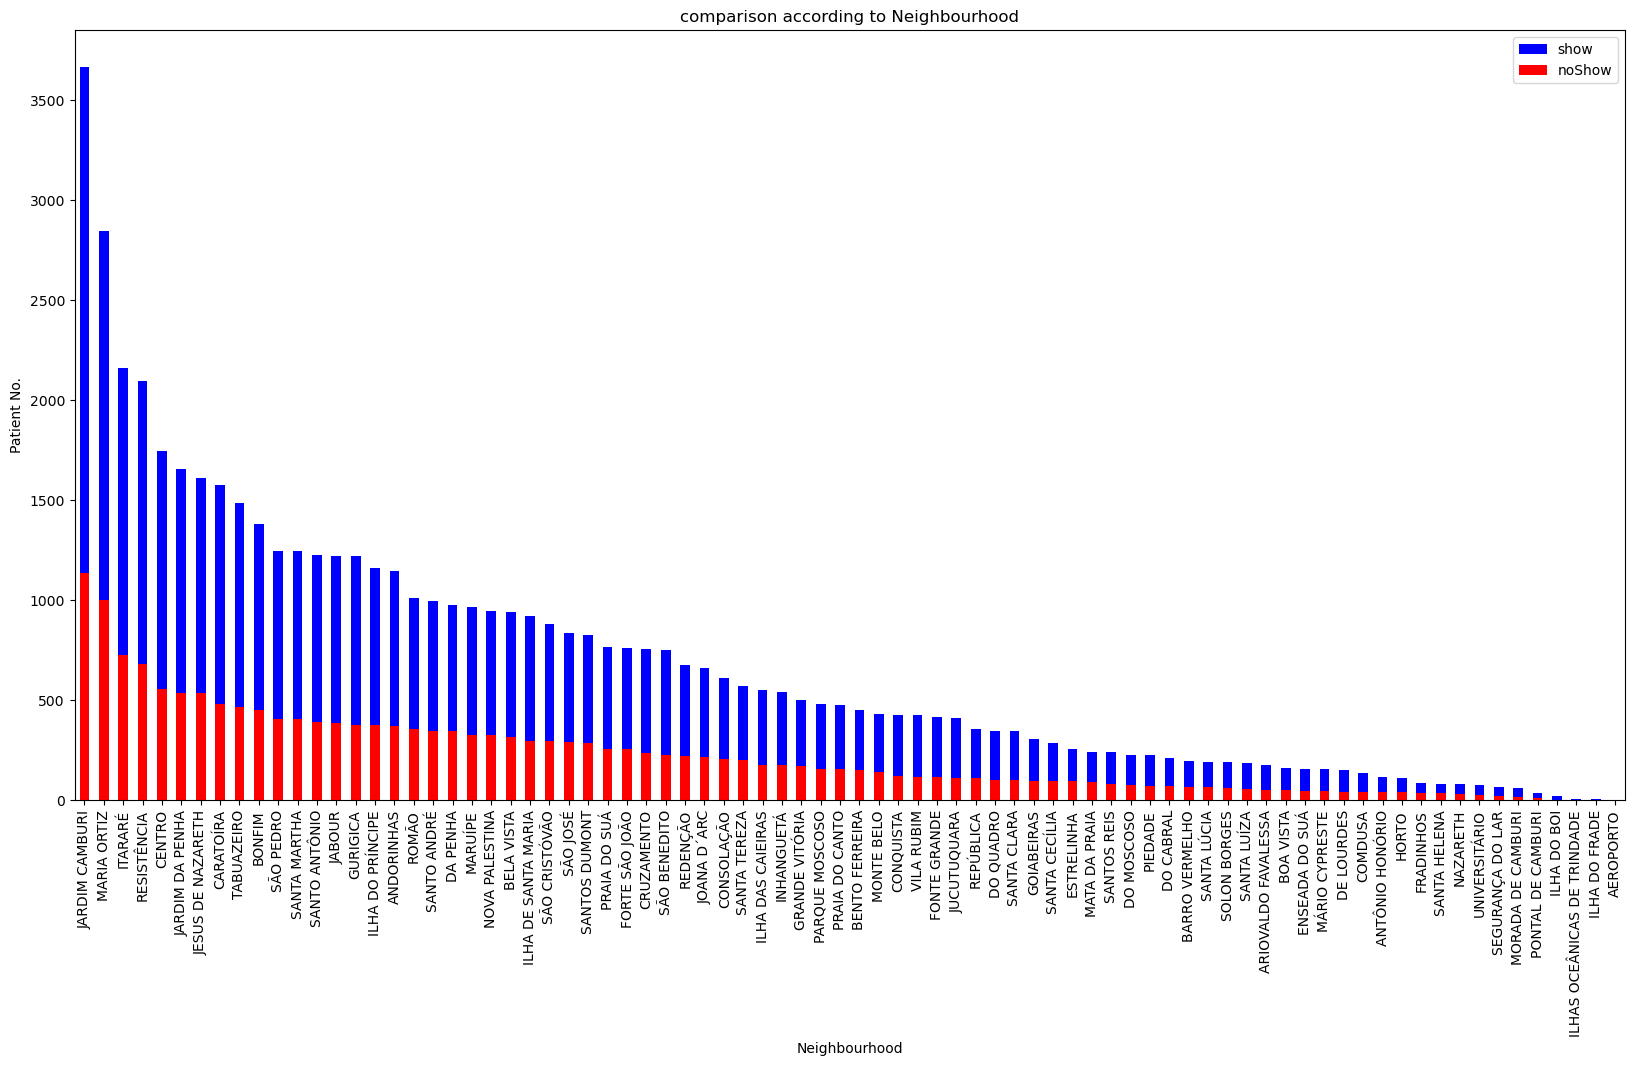

In [33]:
#does neighbourhood affect the attendance?
plt.figure(figsize=(20,10))
data['Neighbourhood'][show].value_counts().plot(kind='bar', color = 'blue', label = 'show')
data['Neighbourhood'][noShow].value_counts().plot(kind='bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('comparison according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient No.')

This means neighbourhood has a great affect on the attendance

Text(0, 0.5, 'patients no.')

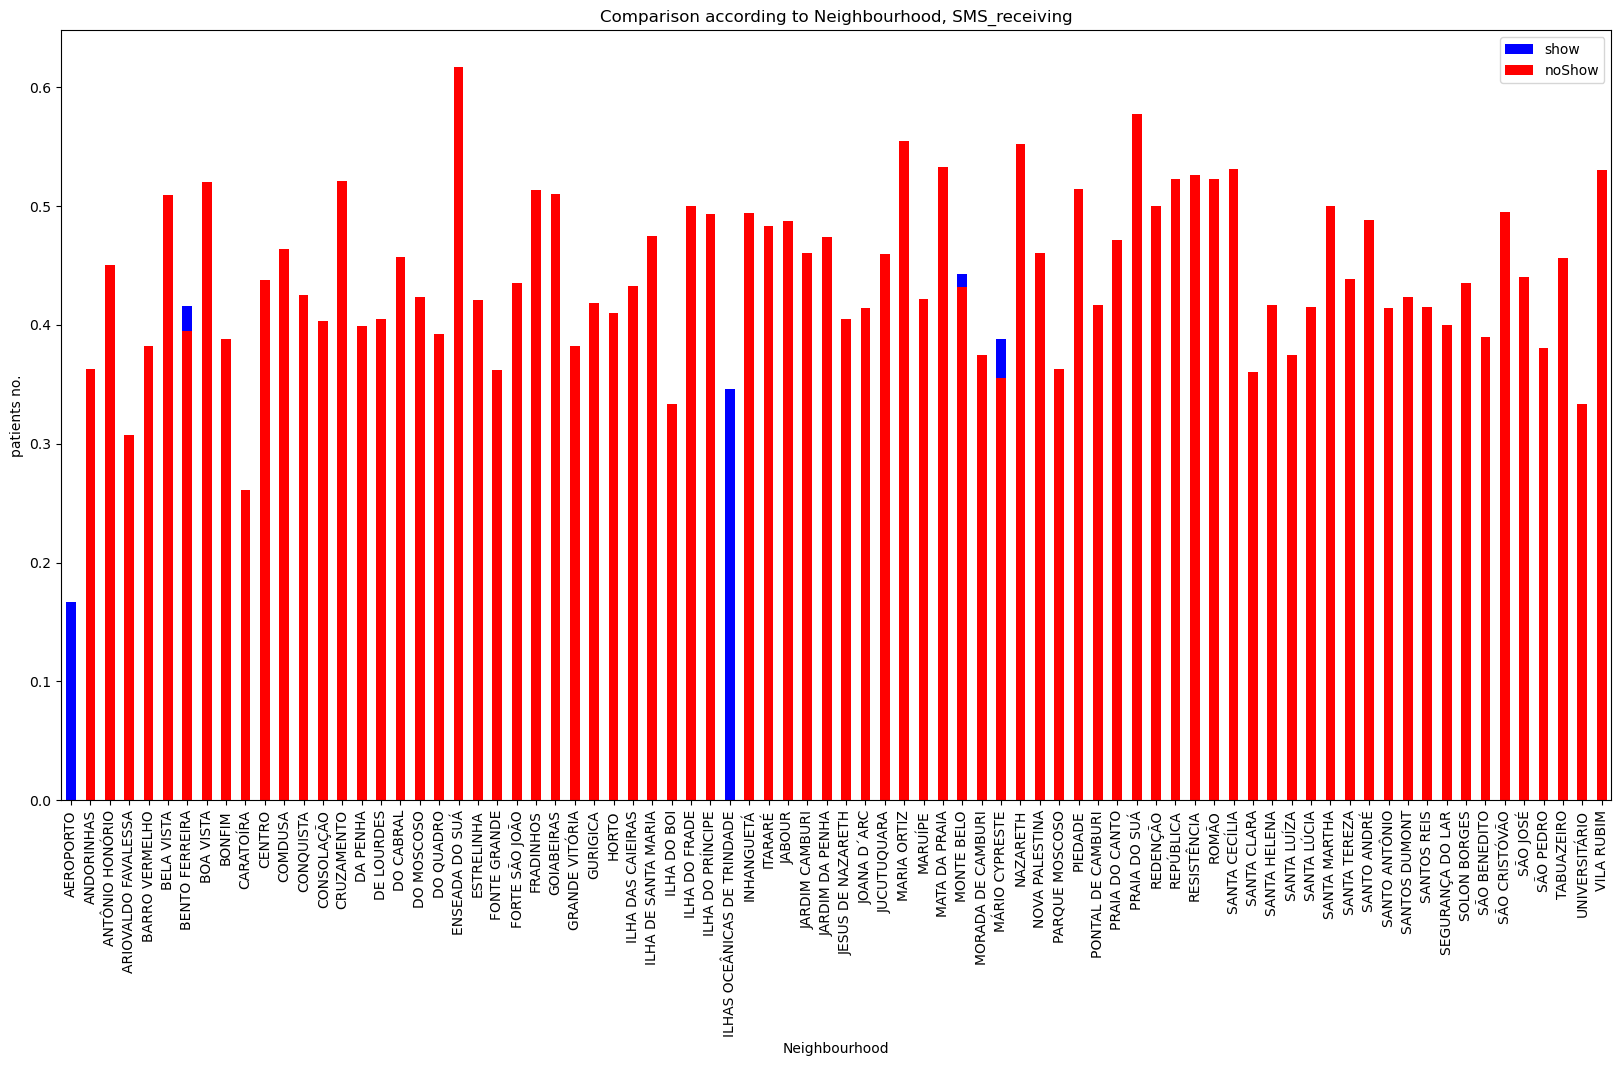

In [34]:
plt.figure(figsize=(20,10))
data[show].groupby('Neighbourhood').SMS_received.mean().plot(kind = 'bar', color = 'blue', label = 'show')
data[noShow].groupby('Neighbourhood').SMS_received.mean().plot(kind = 'bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('Comparison according to Neighbourhood, SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('patients no.')

SMS has response in only 5 neighbourhoods

Text(0, 0.5, 'mean Age')

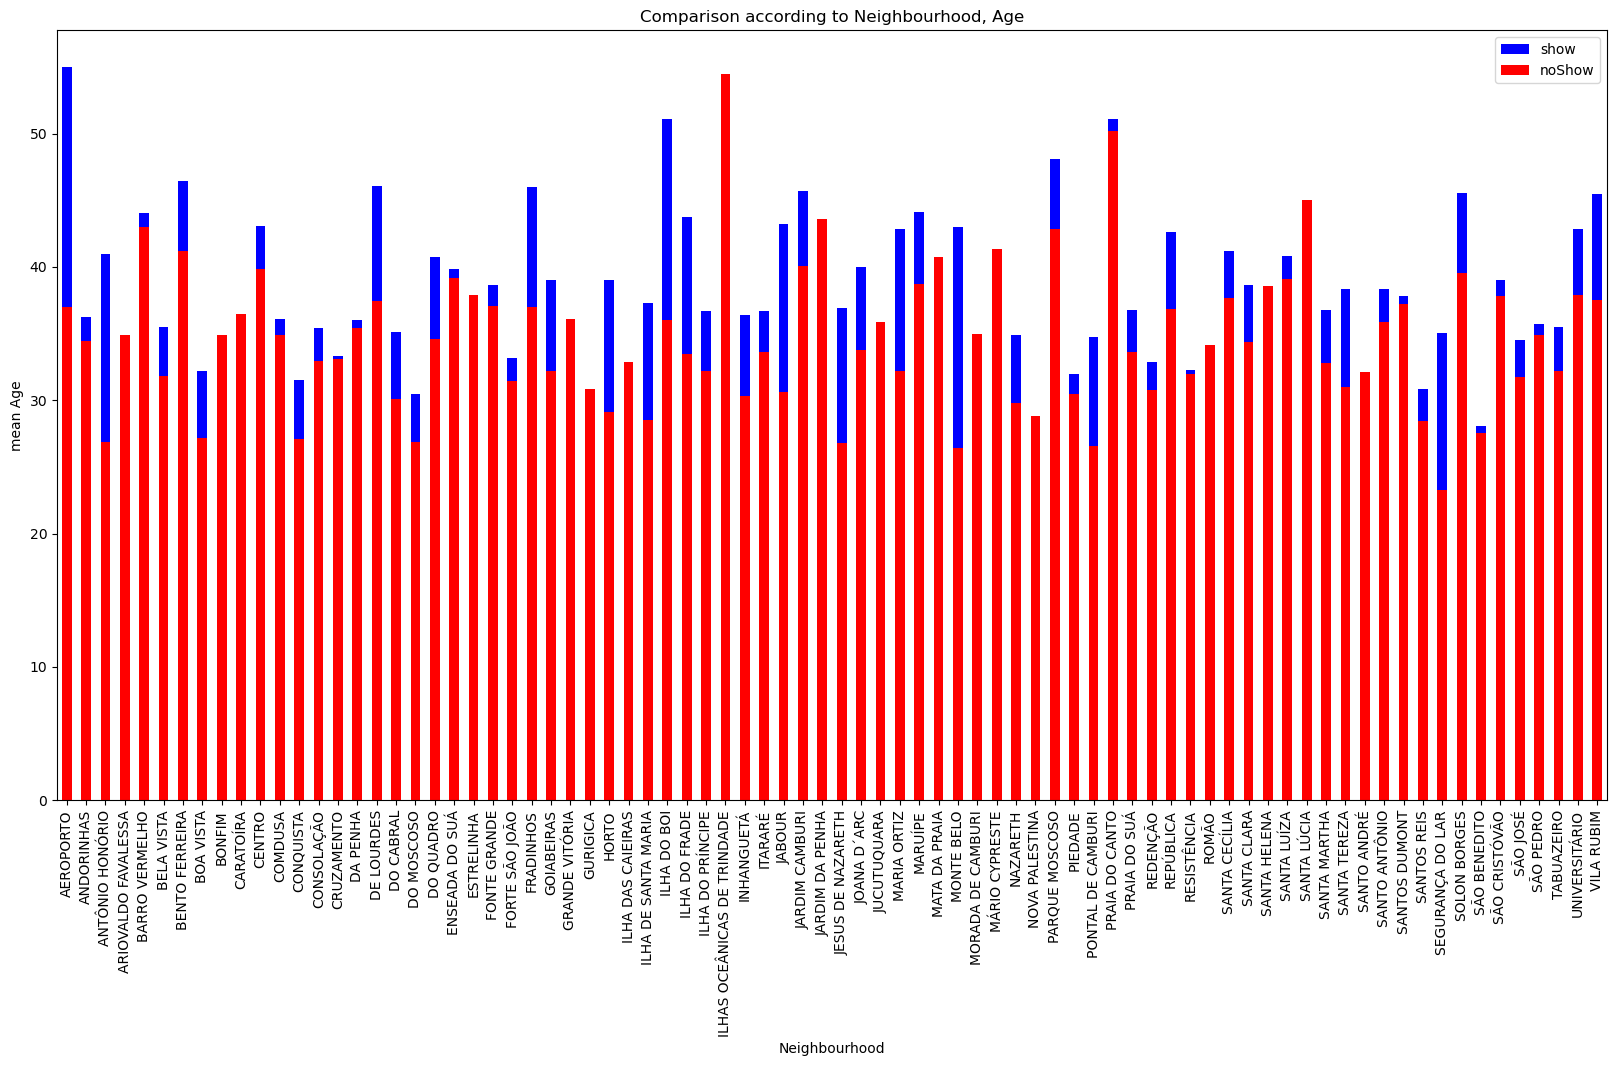

In [35]:
plt.figure(figsize=(20,10))
data[show].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'blue', label = 'show')
data[noShow].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('Comparison according to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('mean Age')

Patients attendance from specific neighbourhood differ according to ages

**Conclusions:**

Neighbourhood has a great effect on attendance or not.

Number of showing patients from specific neighbourhood affected by receving SMS and ages.

Age has a clear influence on the showing rate.

Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that we need to revisit our sms campaign.

No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program. 